## Modeling, Hyperparameter Tuning, and Evaluation

In [1]:
import os
print(os.path.exists(r'e:\Git_repo\Bati_bank_credit_risk\scripts\EDA_Preprocessing.py'))

True


In [2]:
import sys
sys.path.append(r'e:\Git_repo\Bati_bank_credit_risk\scripts')

### Import Libraries

In [3]:
import os,sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import pickle

# importing all modules from scripts 
from EDA_Preprocessing import *

In [4]:
# Get the absolute path of the parent directory
absolutepath = os.path.abspath('..')
if absolutepath not in sys.path:
    sys.path.insert(0, absolutepath)

### Load data

In [5]:
# Load the datasets
df = pd.read_csv("E:/data06/data.csv")
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


#### Data preparation - conversion

In [6]:
# Convert TransactionStartTime to datetime format
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

In [7]:
X = df[['Amount', 'Value', 'PricingStrategy', 'FraudResult']]  
y = df['FraudResult']

### Data Splitting - Traing and Test Dataset

In [8]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Hyperparameter Tuning and Modeling

In [9]:
# Initialize SMOTE
smote = SMOTE(random_state=0)

# Fit and resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

### Model Training and Optimization (Hyperparameter Tuning)

In [10]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

### Define Hyperparameter for each model

In [11]:
# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {'classifier__C': [0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'classifier__max_depth': [3, 5, 7, None]},
    'Random Forest': {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [3, 5, 10]},
    'Gradient Boosting': {'classifier__learning_rate': [0.01, 0.1, 0.2], 'classifier__n_estimators': [50, 100, 200]}
}

In [12]:
# Define pipelines
pipelines = {name: Pipeline([
    ('scaler', MinMaxScaler()),  
    ('classifier', model)  
]) for name, model in models.items()}

# Set up GridSearchCV for each model pipeline
grid_searches = {
    name: GridSearchCV(estimator=pipeline, param_grid=param_grids[name], cv=5, scoring='accuracy')
    for name, pipeline in pipelines.items()}

In [13]:
# Train each pipeline with the resampled dataset
for name, grid_search in grid_searches.items():
    grid_search.fit(X_resampled, y_resampled)
    print(f"Best parameters for {name} model: {grid_search.best_params_}")
    bestModel = grid_search.best_params_

Best parameters for Logistic Regression model: {'classifier__C': 0.01}
Best parameters for Decision Tree model: {'classifier__max_depth': 3}
Best parameters for Random Forest model: {'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Best parameters for Gradient Boosting model: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50}


### Model Performance Evaluation

In [17]:
# Initialize a dictionary to store performance metrics
performance_metrics = {}
y_probs = {}

for name, pipeline in grid_searches.items():
    y_pred = pipeline.predict(X_test)  # Predictions on the test set
    y_prob = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    y_probs[name] = y_prob  # Store probabilities for ROC curve
    # Calculate metrics
    performance_metrics[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    }
print(classification_report(y_test, y_pred))

model_performance = pd.DataFrame(performance_metrics).T
model_performance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28643
           1       1.00      1.00      1.00        56

    accuracy                           1.00     28699
   macro avg       1.00      1.00      1.00     28699
weighted avg       1.00      1.00      1.00     28699



,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,1.0,1.0,1.0,1.0,1.0
Decision Tree,1.0,1.0,1.0,1.0,1.0
Random Forest,1.0,1.0,1.0,1.0,1.0
Gradient Boosting,1.0,1.0,1.0,1.0,1.0


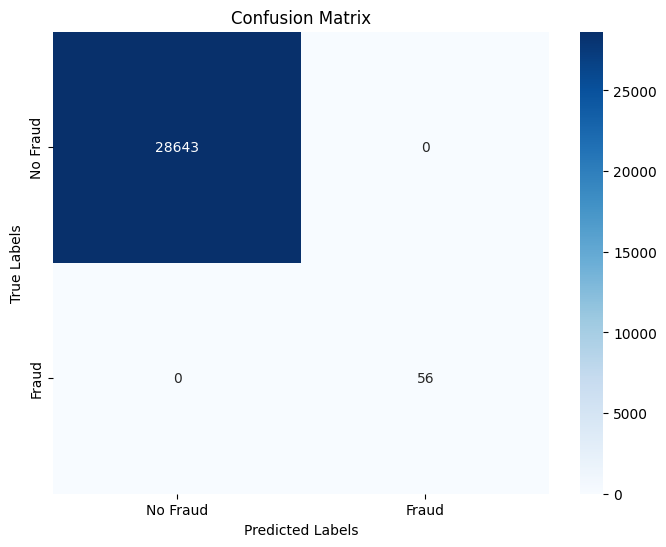

In [18]:
# Plotting the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
# Visualization of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

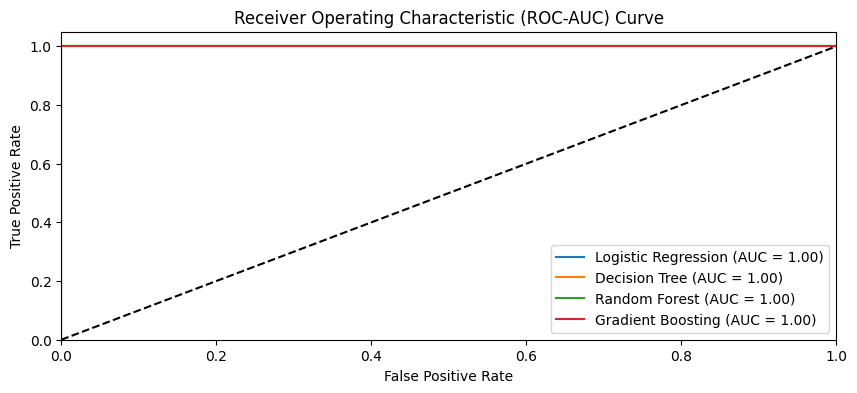

In [19]:
# Set up the plot
plt.figure(figsize=(10, 4))

# Loop through each model's predicted probabilities
for model_name, probs in y_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC-AUC) Curve')
plt.legend(loc='lower right')
plt.show()

In [16]:
# Save the model to a .pkl file in the "model" folder
model_path = os.path.join('E:/Git_repo/Bati_bank_credit_risk', 'Best_model.pkl')
with open(model_path, 'wb') as file:
    pickle.dump(models, file)